[View in Colaboratory](https://colab.research.google.com/github/divsinha99/Black_Friday/blob/master/ML1_BlackFriday_RandomForest_Tuning.ipynb)

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
!pip install fastai

    100% |████████████████████████████████| 430kB 2.1MB/s 
    100% |████████████████████████████████| 1.3MB 996kB/s 
    100% |████████████████████████████████| 1.5MB 788kB/s 
    100% |████████████████████████████████| 112kB 6.7MB/s 
    100% |████████████████████████████████| 256kB 2.8MB/s 
    100% |████████████████████████████████| 20.9MB 62kB/s 


    100% |████████████████████████████████| 3.4MB 373kB/s 
    100% |████████████████████████████████| 112kB 8.9MB/s 
    100% |████████████████████████████████| 51kB 10.0MB/s 
    100% |████████████████████████████████| 51kB 9.7MB/s 
    100% |████████████████████████████████| 2.2MB 564kB/s 
    100% |████████████████████████████████| 61kB 6.0MB/s 
    100% |████████████████████████████████| 552kB 2.1MB/s 
    8% |██▋                             | 348kB 34.6MB/s eta 0:00:01

    100% |████████████████████████████████| 4.2MB 303kB/s 
    100% |████████████████████████████████| 13.7MB 92kB/s 
    100% |████████████████████████████████| 92kB 9.3MB/s 
    100% |████████████████████████████████| 5.7MB 228kB/s 
    100% |████████████████████████████████| 860kB 1.4MB/s 
    100% |████████████████████████████████| 471kB 2.3MB/s 
    100% |████████████████████████████████| 81kB 6.6MB/s 
    100% |████████████████████████████████| 71kB 10.0MB/s 
    100% |████████████████████████████████| 51kB 8.6MB/s 


  Using cached pbr-4.0.2-py2.py3-none-any.whl
    100% |████████████████████████████████| 81kB 7.9MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/13/6b/e1/1f1c38574e6abf3cfd747b345213ed1a4e2bf149646e16408d
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ |

 / - \ done
  Stored in directory: /content/.cache/pip/wheels/cd/f1/d1/7f649928e5f88484c43f57cfc313bfad8b6ee30194a4db6438
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/9d/de/23/0ca11012cc6b573de3f8187727cfa97a8392a8605e331214e5
  Running setup.py bdist_wheel for kaggle-cli ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f0/3c/ff/c98870eeb0ca26250ce6a60dc9be23f547b7ef68b3d6a1c0b5
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/20/29/c9/b3d9f2cbdb6f1eeeb98e263ae687d72e8138a26de91058bd0b
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/af/e2/0e/a6eb84ab88f6f1594960fd9ca2c9aed28872fb468f9bc3464a
  Running setup.py bdist_wheel for jupyter-latex-envs ... - \ done
  Stored in directory: /content/.cache/pip/wheels/8d/1a/c8/3a9f5e0105eb88e1972cd06fcca65d8b904dafe67afacc566

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
%reload_ext autoreload

In [20]:
!ls

datalab  test.csv


In [11]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip
Saving train.zip to train.zip


In [0]:
# Loading the data
df_train = pd.read_csv("train.zip",compression='zip', sep=',')
df_test = pd.read_csv("test.zip", compression='zip', sep=',')

In [13]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
os.makedirs('tmp', exist_ok=True)
df_train.to_feather('tmp/df_train')


In [0]:
df_test.to_feather('tmp/df_test')

In [0]:
import pandas as pd
df_train = pd.read_feather('tmp/df_train')

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [18]:
display_all(df_train.tail().T)

,550063,550064,550065,550066,550067
User_ID,1006033,1006035,1006036,1006038,1006039
Product_ID,P00372445,P00375436,P00375436,P00375436,P00371644
Gender,M,F,F,F,F
Age,51-55,26-35,26-35,55+,46-50
Occupation,13,1,15,1,0
City_Category,B,C,B,C,B
Stay_In_Current_City_Years,1,3,4+,2,4+
Marital_Status,1,0,1,0,1
Product_Category_1,20,20,20,20,20
Product_Category_2,NaN,NaN,NaN,NaN,NaN


In [67]:
#need to drop the UserID and Product_ID
df_train.drop(['User_ID','Product_ID'],axis=1,inplace=True)
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
# to convert strings variables into categorical variables
train_cats(df_train)

In [69]:
df_train.Gender.cat.categories

Index(['F', 'M'], dtype='object')

In [70]:
df_train.City_Category.cat.categories

Index(['A', 'B', 'C'], dtype='object')

In [71]:
df_train.Age.cat.categories

Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object')

## **To check for missing values in the dataframe:**

We can see only Product_Category_2 and Product_Category_3 are having Null values of 31% and 69% respectively.

In [72]:
display_all(df_train.isnull().sum().sort_index()/len(df_train))

Age                           0.000000
City_Category                 0.000000
Gender                        0.000000
Marital_Status                0.000000
Occupation                    0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
Stay_In_Current_City_Years    0.000000
dtype: float64

# Pre-processing - 

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [0]:
df, y, nas = proc_df(df_train, 'Purchase')

We now have something that we can pass into RandomForestRegressor.
n_jobs = -1 enables parallel computing such that the processing can run parallely on multiple CPU's.

In [74]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.7755118565233211

R^2 score of 0.77 might have underfit or overfit the model. We need to see the results tuning the tree parameters and splitting the dataset into test set and train set. 

A validation set helps diagnose this problem.

In [75]:
df.shape

(550068, 11)

In [76]:
df_test.shape

(233599, 11)

In [79]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 70080  # same as AV's Public leaderboard (30% of test data) test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_train, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((479988, 11), (479988,), (70080, 11))

# Base model
Let's try our model again, this time with separate training and validation sets

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [81]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 19.5 s, sys: 18 ms, total: 19.5 s
Wall time: 9.96 s
[2362.0232430303945, 3088.932187602444, 0.7749754029416123, 0.659251958178109]


We can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

# Single tree

In [82]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3899.6097231257986, 3827.6237024495836, 0.38665624447140623, 0.4767911385334229]


In [83]:
m.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1057779640, splitter='best')

In [65]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,121 kB of archives.
After this operation, 2

Selecting previously unselected package libxcb-render0:amd64.
Preparing to unpack .../09-libxcb-render0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-render0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../10-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-3) ...
Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../14-libdatrie1_0.2.10-5_amd64.deb ...
Unpacking libdatrie1:amd64 (0.2.10-5) ...
Se

Setting up graphviz (2.38.0-16ubuntu2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


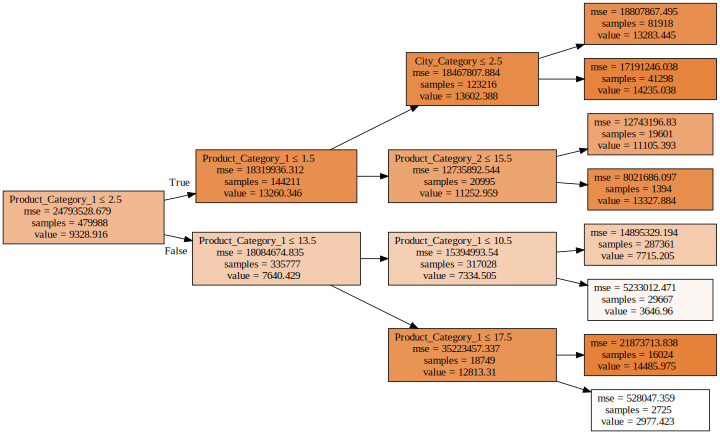

In [84]:
draw_tree(m.estimators_[0], df, precision=3)

Let's see what happens if we create a bigger tree.

In [85]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2266.067905473287, 3315.6104866038268, 0.7928869335733293, 0.6074060257908063]


The validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

# Bagging
## Intro to bagging
To learn about bagging in random forests, let's start with our basic model again.

In [86]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2361.044037011375, 3098.173385217781, 0.7751619377414287, 0.6572100678859769]


We'll grab the predictions for each individual tree, and look at one example.

In [87]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds

array([[ 7748.75714,  6705.44   , 15545.8    , ...,  3004.     ,  2728.33333,  2309.     ],
       [ 7545.1875 ,  7296.92308, 16711.     , ...,  3148.     ,  3063.     ,  2275.     ],
       [ 7946.20968,  7240.97436, 16711.     , ...,  3148.     ,  2670.5    ,  2402.14286],
       ...,
       [ 7822.44   ,  7112.2973 , 12320.     , ...,  3137.5    ,  3298.66667,  2362.     ],
       [ 7870.69231,  7384.24138, 16711.     , ...,  3148.     ,  3877.     ,  2334.     ],
       [ 7525.09859,  7257.67568, 16711.     , ...,  3148.     ,  3754.     ,  2378.83333]])

In [88]:
preds.shape

(10, 70080)

Looking at the 10 predictions of the first sample of Valid set; taking the mean and comparing it with the actual y_valid.

In [89]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([7748.75714, 7545.1875 , 7946.20968, 7669.18919, 7835.20833, 7765.04545, 7743.66129, 7822.44   ,
        7870.69231, 7525.09859]), 7747.148948690866, 7804)

## Plotting R^2 scores of predicted values:
Plotting the R^2 scores of all the predicted values (mean predicted value of 10 individual trees for each row of data) against their corresponding y_valid. 

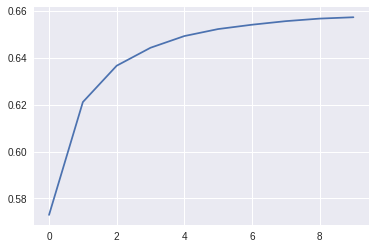

In [90]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample).
Let's compare the results by increasing the number of trees.

In [92]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2340.472120516386, 3068.2530729025507, 0.7790629233189666, 0.6637990192107639]


In [93]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2330.074004968627, 3057.9805643713084, 0.7810216956628703, 0.6660464518642373]


In [94]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2324.357703178169, 3051.4704172184097, 0.7820948037569809, 0.6674668484193275]


So, after running the RF model for 20,40 and 80 trees, we didn't find any significant improvement in the R^ scores from n=40 to n=80.

# Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different set of userID's or productID's, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [95]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2329.8485544818336, 3058.7133755873415, 0.7810640688894916, 0.6658863761388596, 0.6201317123711563]


We can see that 0.62 of OOB score clearly indicates that it is not a better model and is clearly overfitted.

# Reducing over-fitting
## Subsampling
It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [0]:
df_trn, y_trn, nas = proc_df(df_train, 'Purchase')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [102]:
n_trn

479988

In [0]:
set_rf_samples(40000)

In [110]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.42 s, sys: 12 ms, total: 3.43 s
Wall time: 2.59 s
[2837.8622675043703, 3021.6861878568907, 0.6751788600308397, 0.6739266245616382, 0.6326607443808501]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful. So, increasing the number of trees to our earlier seen value, n=40.

In [111]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2739.0942602094447, 2925.3811769448744, 0.6973953379734248, 0.6943801588475818, 0.6575049684445007]


Clearly, our model improved here!!!

In [113]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [0]:
# dropping userID and productID column
df_test_drop = df_test.drop(['User_ID'],axis=1)

# to convert strings variables into categorical variables
train_cats(df_test_drop)

#to impute missing values and split the dataset into x & y
#lets use the product id column to pass as the splitting parameter for splitting into y variable
test_df_na_removed, _, nas = proc_df(df_test_drop, y_fld = 'Product_ID')

In [130]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [126]:
test_df_na_removed.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_2_na,Product_Category_3_na
0,2,5,7,2,3,1,1,11.0,14.0,False,True
1,2,3,17,3,1,0,3,5.0,14.0,False,True
2,1,4,1,2,5,1,5,14.0,14.0,False,True
3,1,4,1,2,5,1,4,9.0,14.0,False,True
4,1,3,1,3,2,0,4,5.0,12.0,False,False


In [127]:
test_df_na_removed.shape

(233599, 11)

In [128]:
n_test = test_df_na_removed.shape[0]
X_test, _ = split_vals(test_df_na_removed, n_test)
test_predictions = m.predict(X_test)
test_predictions


array([15025.37917,  9281.     ,  7043.6825 , ..., 14157.3625 , 19235.675  ,  2102.83333])

In [0]:
pred = pd.DataFrame(test_predictions)
#res = pd.concat([df_test['Product_ID'], pred], axis = 1)

In [133]:
res = pd.concat([df_test['Product_ID'], pred], axis = 1)
res.head()

,Product_ID,0
0,P00128942,15025.379167
1,P00113442,9281.000000
2,P00288442,7043.682500
3,P00145342,2584.837500
4,P00053842,2560.662500


In [134]:
res = pd.concat([df_test['User_ID'], res], axis = 1)
res.head()

,User_ID,Product_ID,0
0,1000004,P00128942,15025.379167
1,1000009,P00113442,9281.000000
2,1000010,P00288442,7043.682500
3,1000010,P00145342,2584.837500
4,1000011,P00053842,2560.662500


In [135]:
res = res.rename(columns={0: "Purchase"})
res.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15025.379167
1,1000009,P00113442,9281.000000
2,1000010,P00288442,7043.682500
3,1000010,P00145342,2584.837500
4,1000011,P00053842,2560.662500


In [0]:
res.to_csv('SampleSubmission.csv', index=False)

In [0]:
files.download('SampleSubmission.csv')

# Tree building parameters
We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [0]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [139]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2329.8169378277607, 3057.856458479622, 0.7810700108848352, 0.6660735578323631, 0.6202226815901868]


Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [140]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2515.9746799744676, 2951.3880789047084, 0.7446862577624855, 0.6889220287907845, 0.6482333523447567]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.



1.   None
2.   0.5
3.   'sqrt'


*   1, 3, 5, 10, 25, 100









In [141]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2561.373165647749, 2930.378733476735, 0.73538931958102, 0.693335059448621, 0.6547746436246943]


In [146]:
m = RandomForestRegressor(n_estimators=95, min_samples_leaf=5, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2698.338628699449, 2997.1657573038283, 0.7063333965310057, 0.6791972041101877, 0.6550255674839027]


In [147]:
m = RandomForestRegressor(n_estimators=95, min_samples_leaf=10, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2815.634956765119, 3048.9311639278303, 0.6802472002899043, 0.6680200470153883, 0.649385281107038]
